# Task 4.10: Coding Etiquette & Excel Reporting, EXTRA EXPLORATION FOR Steps 5-8

## Standard prerequisites.  Now with additional libraries seaborn, matplotlib, and scipy.

In [1]:
# Import libraries
import pandas as pd
# I'm trying modin as a drop-in replace-- er, enhancement to pandas; supposedly it will help use more than one CPU core.
# Nope.  I'm having too much trouble getting modin installed, so it's back to plain old Pandas for now. :-(
# import modin.pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [3]:
# Import itertools to help loop through lots of things.
import itertools

In [4]:
# Set a PATH variable.

In [5]:
# Linux PATH - Sadly, my Linux system with 8GB of total RAM could not import the new df_ords_prior DataFrame.
# BUT, now I have moved again, to an AWS EC2 instance that should be able to handle this.

In [6]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement4/Instacart-Basket-Analysis')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [7]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement4/Instacart-Basket-Analysis')

In [8]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM, so I migrated there.

In [9]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

# This new notebook is for exploring the new summary dataset that I created.  The dataset is a summary of all the purchases made by customers who match each of the 5,184 possible combinations from eight demographic columns.

In [10]:
# Open our new summary dataset.

In [11]:
summ_combo_df = pd.read_pickle(os.path.join(path, '02-Data', 'Prepared-Data', 'summ_combo_df.pkl'))

In [12]:
# In case we need it, let's load the high_cust_df_three_more_columns from its pickle file.

In [13]:
high_cust_df_three_more_columns = pd.read_pickle(os.path.join(path, '02-Data', 'Prepared-Data', 'high_cust_df_three_more_columns.pkl'))

In [14]:
#show all columns
pd.set_option('display.max_columns', None)

In [15]:
# Some sanity checks

In [16]:
high_cust_df_three_more_columns.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404847
Data columns (total 37 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   product_id              int64  
 2   product_name            object 
 3   aisle_id                int64  
 4   department_id           int64  
 5   prices                  float64
 6   order_id                int64  
 7   customer_id             int64  
 8   order_number            int64  
 9   orders_day_of_week      int64  
 10  order_hour_of_day       int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  price_range             object 
 15  price_range_loc         object 
 16  busiest_days            object 
 17  busiest_hours           object 
 18  max_order               int64  
 19  loyalty_flag            object 
 20  avg_order               float64
 21  spending_flag           objec

In [17]:
# We don't actually have customers who match all 5,184 possible
# combinations of the eight demographic columns I chose.
summ_combo_df.shape

(3253, 51)

In [18]:
summ_combo_df

,total_order_count,count_snacks,prcnt_snacks,count_meat seafood,prcnt_meat seafood,count_bulk,prcnt_bulk,count_produce,prcnt_produce,count_breakfast,prcnt_breakfast,count_pantry,prcnt_pantry,count_dairy eggs,prcnt_dairy eggs,count_frozen,prcnt_frozen,count_beverages,prcnt_beverages,count_deli,prcnt_deli,count_household,prcnt_household,count_personal care,prcnt_personal care,count_bakery,prcnt_bakery,count_international,prcnt_international,count_other,prcnt_other,count_missing,prcnt_missing,count_canned goods,prcnt_canned goods,count_dry goods pasta,prcnt_dry goods pasta,count_babies,prcnt_babies,count_alcohol,prcnt_alcohol,count_pets,prcnt_pets,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
0,14526,2632.0,18.0,92.0,1.0,6.0,0.0,3272.0,23.0,468.0,3.0,664.0,5.0,2209.0,15.0,807.0,6.0,2140.0,15.0,413.0,3.0,322.0,2.0,238.0,2.0,449.0,3.0,92.0,1.0,6.0,0.0,29.0,0.0,287.0,2.0,235.0,2.0,93.0,1.0,47.0,0.0,25.0,0.0,Regular customer,Low spender,Frequent customer,Male,married,Midwest,Older,Lower
1,53274,3865.0,7.0,1332.0,3.0,96.0,0.0,17315.0,33.0,995.0,2.0,2982.0,6.0,8751.0,16.0,3529.0,7.0,4082.0,8.0,1663.0,3.0,991.0,2.0,642.0,1.0,1768.0,3.0,504.0,1.0,43.0,0.0,111.0,0.0,1645.0,3.0,1295.0,2.0,1251.0,2.0,296.0,1.0,118.0,0.0,Regular customer,Low spender,Frequent customer,Male,married,Midwest,Older,Higher
2,18091,1519.0,8.0,416.0,2.0,15.0,0.0,5229.0,29.0,426.0,2.0,1055.0,6.0,3161.0,17.0,1176.0,7.0,1326.0,7.0,525.0,3.0,401.0,2.0,233.0,1.0,664.0,4.0,118.0,1.0,21.0,0.0,27.0,0.0,652.0,4.0,412.0,2.0,379.0,2.0,192.0,1.0,144.0,1.0,Regular customer,Low spender,Frequent customer,Male,married,Midwest,Older,Low-mid
3,54127,4079.0,8.0,1546.0,3.0,25.0,0.0,17004.0,31.0,1192.0,2.0,3258.0,6.0,8778.0,16.0,3683.0,7.0,4288.0,8.0,1453.0,3.0,1199.0,2.0,772.0,1.0,1705.0,3.0,523.0,1.0,47.0,0.0,197.0,0.0,1855.0,3.0,1477.0,3.0,565.0,1.0,329.0,1.0,152.0,0.0,Regular customer,Low spender,Frequent customer,Male,married,Midwest,Older,Mid-high
4,22078,3874.0,18.0,186.0,1.0,18.0,0.0,4197.0,19.0,633.0,3.0,1133.0,5.0,3656.0,17.0,1671.0,8.0,2256.0,10.0,613.0,3.0,609.0,3.0,407.0,2.0,852.0,4.0,177.0,1.0,8.0,0.0,84.0,0.0,635.0,3.0,556.0,3.0,336.0,2.0,123.0,1.0,54.0,0.0,Regular customer,Low spender,Frequent customer,Male,married,Midwest,Late-mid,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,425,47.0,11.0,27.0,6.0,NaN,NaN,186.0,44.0,8.0,2.0,21.0,5.0,56.0,13.0,NaN,NaN,11.0,3.0,13.0,3.0,2.0,0.0,NaN,NaN,29.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,22.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Loyal customer,High spender,Frequent customer,Female,single,West,Early-mid,Mid-high
3249,1138,89.0,8.0,35.0,3.0,NaN,NaN,164.0,14.0,24.0,2.0,54.0,5.0,227.0,20.0,35.0,3.0,144.0,13.0,59.0,5.0,84.0,7.0,36.0,3.0,85.0,7.0,7.0,1.0,4.0,0.0,NaN,NaN,18.0,2.0,39.0,3.0,24.0,2.0,7.0,1.0,3.0,0.0,Loyal customer,High spender,Frequent customer,Female,single,South,Younger,Higher
3250,1192,83.0,7.0,15.0,1.0,NaN,NaN,196.0,16.0,95.0,8.0,122.0,10.0,157.0,13.0,101.0,8.0,264.0,22.0,14.0,1.0,3.0,0.0,1.0,0.0,122.0,10.0,2.0,0.0,3.0,0.0,NaN,NaN,5.0,0.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Loyal customer,High spender,Frequent customer,Female,single,South,Early-mid,Lower
3251,2539,326.0,13.0,12.0,0.0,NaN,NaN,616.0,24.0,86.0,3.0,153.0,6.0,463.0,18.0,227.0,9.0,237.0,9.0,74.0,3.0,8.0,0.0,30.0,1.0,119.0,5.0,12.0,0.0,1.0,0.0,9.0,0.0,58.0,2.0,62.0,2.0,46.0,2.0,NaN,NaN,NaN,NaN,Loyal customer,High spender,Frequent customer,Female,single,South,Early-mid,Higher


In [19]:
summ_combo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_order_count      3253 non-null   int64  
 1   count_snacks           3030 non-null   float64
 2   prcnt_snacks           3030 non-null   float64
 3   count_meat seafood     2982 non-null   float64
 4   prcnt_meat seafood     2982 non-null   float64
 5   count_bulk             1662 non-null   float64
 6   prcnt_bulk             1662 non-null   float64
 7   count_produce          3175 non-null   float64
 8   prcnt_produce          3175 non-null   float64
 9   count_breakfast        2810 non-null   float64
 10  prcnt_breakfast        2810 non-null   float64
 11  count_pantry           3088 non-null   float64
 12  prcnt_pantry           3088 non-null   float64
 13  count_dairy eggs       3181 non-null   float64
 14  prcnt_dairy eggs       3181 non-null   float64
 15  coun

## OK, now that we have our demographic summary table, what can it show us?

In [20]:
# Define again our list of eight demographic columns.
demo_columns = ['loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']

### The 'prcnt_snacks' column has some strong outliers!  Someone makes mostly snack purchases!

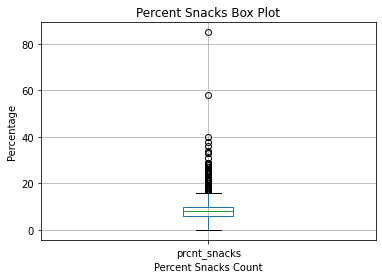

In [21]:
# Box plot of percentage orders for snacks.
summ_combo_df.boxplot(column='prcnt_snacks')

# set plot title and axis labels
plt.title('Percent Snacks Box Plot')
plt.xlabel('Percent Snacks Count')
plt.ylabel('Percentage')

# Save the plot to a file.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'boxplot_prcnt_snacks.png'), facecolor='white')

# display the plot
plt.show()

In [22]:
summ_combo_df['prcnt_snacks'].describe()

count    3030.000000
mean        8.555446
std         4.621286
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        85.000000
Name: prcnt_snacks, dtype: float64

In [23]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] > 10]['prcnt_snacks'].value_counts().sort_index()

11.0    133
12.0     76
13.0     72
14.0     65
15.0     50
16.0     55
17.0     46
18.0     40
19.0     27
20.0     14
21.0      9
22.0     10
23.0      4
24.0      5
25.0      3
26.0      3
27.0      3
28.0      2
29.0      4
31.0      1
33.0      2
34.0      1
36.0      1
38.0      1
40.0      1
58.0      1
85.0      1
Name: prcnt_snacks, dtype: int64

<AxesSubplot:>

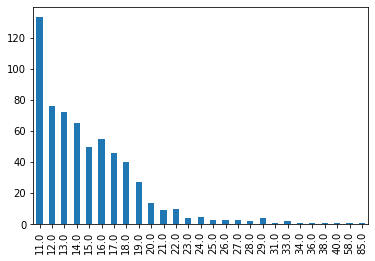

In [24]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] > 10]['prcnt_snacks'].value_counts().sort_index().plot.bar()

In [25]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 40]['prcnt_snacks'].value_counts().info()

<class 'pandas.core.series.Series'>
Float64Index: 1 entries, 40.0 to 40.0
Series name: prcnt_snacks
Non-Null Count  Dtype
--------------  -----
1 non-null      int64
dtypes: int64(1)
memory usage: 16.0 bytes


<AxesSubplot:>

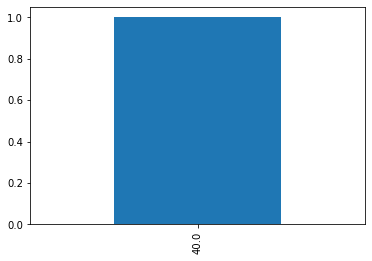

In [26]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 40]['prcnt_snacks'].value_counts().sort_index().plot.bar()

In [27]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 40]['prcnt_snacks'],summ_combo_df.columns[-8:]

(870    40.0
 Name: prcnt_snacks, dtype: float64,
 Index(['loyalty_flag', 'spending_flag', 'frequency_flag', 'gender',
        'fam_status', 'region', 'age_category', 'income_category'],
       dtype='object'))

In [28]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 40][['prcnt_snacks'] + demo_columns].sort_values('prcnt_snacks', ascending=False)

,prcnt_snacks,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
870,40.0,Regular customer,Low spender,Non-frequent customer,Female,single,South,Early-mid,Lower


In [29]:
# Let's dig further into the demographic with 40% snack purchases.

In [30]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 40][['prcnt_snacks'] + demo_columns].sort_values('prcnt_snacks', ascending=False).head(1)

,prcnt_snacks,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
870,40.0,Regular customer,Low spender,Non-frequent customer,Female,single,South,Early-mid,Lower


In [31]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 40].sort_values('prcnt_snacks', ascending=False)

,total_order_count,count_snacks,prcnt_snacks,count_meat seafood,prcnt_meat seafood,count_bulk,prcnt_bulk,count_produce,prcnt_produce,count_breakfast,prcnt_breakfast,count_pantry,prcnt_pantry,count_dairy eggs,prcnt_dairy eggs,count_frozen,prcnt_frozen,count_beverages,prcnt_beverages,count_deli,prcnt_deli,count_household,prcnt_household,count_personal care,prcnt_personal care,count_bakery,prcnt_bakery,count_international,prcnt_international,count_other,prcnt_other,count_missing,prcnt_missing,count_canned goods,prcnt_canned goods,count_dry goods pasta,prcnt_dry goods pasta,count_babies,prcnt_babies,count_alcohol,prcnt_alcohol,count_pets,prcnt_pets,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
870,1133,448.0,40.0,19.0,2.0,1.0,0.0,163.0,14.0,21.0,2.0,14.0,1.0,106.0,9.0,24.0,2.0,258.0,23.0,22.0,2.0,32.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,NaN,NaN,2.0,0.0,6.0,1.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Regular customer,Low spender,Non-frequent customer,Female,single,South,Early-mid,Lower


In [32]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 40][['prcnt_snacks'] + demo_columns]

,prcnt_snacks,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
870,40.0,Regular customer,Low spender,Non-frequent customer,Female,single,South,Early-mid,Lower


In [33]:
forty_prcnt_snackers_df = summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 40][['prcnt_snacks'] + demo_columns]

In [34]:
forty_prcnt_snackers_stats_df = pd.merge(forty_prcnt_snackers_df, high_cust_df_three_more_columns, how='left')

In [35]:
forty_prcnt_snackers_stats_df.shape

(1133, 38)

In [36]:
forty_prcnt_snackers_stats_df['customer_id'].value_counts()

14984     377
106076    150
128047    119
10014      97
133791     90
130309     61
141668     43
158143     38
108385     33
168828     31
53146      29
158490     27
6478       25
82102      13
Name: customer_id, dtype: int64

In [37]:
len(forty_prcnt_snackers_stats_df['customer_id'].value_counts().unique())

14

In [38]:
forty_prcnt_snackers_stats_df['state'].value_counts()

South Carolina    420
Kentucky          218
Virginia          150
Mississippi       119
Arkansas           90
Tennessee          51
Florida            33
Maryland           27
Alabama            25
Name: state, dtype: int64

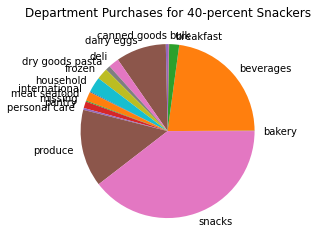

In [39]:
grouped = forty_prcnt_snackers_stats_df.groupby('department').size()
plt.pie(grouped.values, labels=grouped.index)
plt.title("Department Purchases for 40-percent Snackers")

# Save the plot to a file.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'pie_forty_prcnt_snackers_stats_df.png'), facecolor='white')

plt.show()
print ()

In [40]:
# Let's investigate the demographic with 85% snack purchases.

In [41]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 85][['prcnt_snacks'] + demo_columns].sort_values('prcnt_snacks', ascending=False).head(1)

,prcnt_snacks,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
3091,85.0,Loyal customer,Low spender,Regular customer,Male,married,Midwest,Early-mid,Lower


In [42]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 85].sort_values('prcnt_snacks', ascending=False)

,total_order_count,count_snacks,prcnt_snacks,count_meat seafood,prcnt_meat seafood,count_bulk,prcnt_bulk,count_produce,prcnt_produce,count_breakfast,prcnt_breakfast,count_pantry,prcnt_pantry,count_dairy eggs,prcnt_dairy eggs,count_frozen,prcnt_frozen,count_beverages,prcnt_beverages,count_deli,prcnt_deli,count_household,prcnt_household,count_personal care,prcnt_personal care,count_bakery,prcnt_bakery,count_international,prcnt_international,count_other,prcnt_other,count_missing,prcnt_missing,count_canned goods,prcnt_canned goods,count_dry goods pasta,prcnt_dry goods pasta,count_babies,prcnt_babies,count_alcohol,prcnt_alcohol,count_pets,prcnt_pets,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
3091,147,125.0,85.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,8.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Loyal customer,Low spender,Regular customer,Male,married,Midwest,Early-mid,Lower


In [43]:
summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 85][['prcnt_snacks'] + demo_columns]

,prcnt_snacks,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
3091,85.0,Loyal customer,Low spender,Regular customer,Male,married,Midwest,Early-mid,Lower


In [44]:
eighty_five_prcnt_snackers_df = summ_combo_df.loc[summ_combo_df['prcnt_snacks'] == 85][['prcnt_snacks'] + demo_columns]

In [45]:
eighty_five_prcnt_snackers_stats_df = pd.merge(eighty_five_prcnt_snackers_df, high_cust_df_three_more_columns, how='left')

In [46]:
eighty_five_prcnt_snackers_stats_df.shape

(147, 38)

In [47]:
eighty_five_prcnt_snackers_stats_df['customer_id'].value_counts()

33835    147
Name: customer_id, dtype: int64

In [48]:
len(eighty_five_prcnt_snackers_stats_df['customer_id'].value_counts().unique())

1

In [49]:
eighty_five_prcnt_snackers_stats_df['state'].value_counts()

Nebraska    147
Name: state, dtype: int64

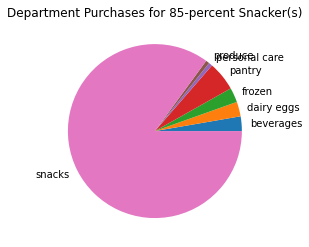

In [50]:
grouped = eighty_five_prcnt_snackers_stats_df.groupby('department').size()
plt.pie(grouped.values, labels=grouped.index)
plt.title("Department Purchases for 85-percent Snacker(s)")

# Save the plot to a file.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'pie_eighty_five_prcnt_snackers_stats_df.png'), facecolor='white')

plt.show()
print ()

## Check the 'produce' percentage, next!

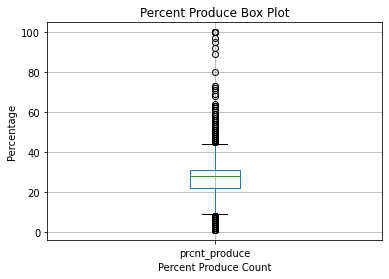

In [51]:
# Box plot of percentage orders for produce.
summ_combo_df.boxplot(column='prcnt_produce')

# set plot title and axis labels
plt.title('Percent Produce Box Plot')
plt.xlabel('Percent Produce Count')
plt.ylabel('Percentage')

# Save the plot to a file.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'boxplot_prcnt_produce.png'), facecolor='white')

# display the plot
plt.show()

In [52]:
summ_combo_df['prcnt_produce'].describe()

count    3175.000000
mean       26.571969
std         9.673552
min         1.000000
25%        22.000000
50%        28.000000
75%        31.000000
max       100.000000
Name: prcnt_produce, dtype: float64

In [53]:
summ_combo_df.loc[(summ_combo_df['prcnt_produce'] > 0) & (summ_combo_df['prcnt_produce'] <= 10)]['prcnt_produce'].value_counts().sort_index()

1.0      8
2.0     15
3.0     15
4.0     18
5.0     17
6.0     13
7.0     27
8.0     22
9.0     31
10.0    23
Name: prcnt_produce, dtype: int64

In [54]:
#pd.set_option('display.max_rows', None)

In [55]:
summ_combo_df.loc[(summ_combo_df['prcnt_produce'] > 0) & (summ_combo_df['prcnt_produce'] <= 100)]['prcnt_produce'].value_counts().sort_values()

72.0      1
52.0      1
62.0      1
89.0      1
69.0      1
       ... 
27.0    189
26.0    198
30.0    254
29.0    277
28.0    281
Name: prcnt_produce, Length: 74, dtype: int64

In [56]:
result = summ_combo_df.loc[(summ_combo_df['prcnt_produce'] > 0) & (summ_combo_df['prcnt_produce'] <= 100)]['prcnt_produce'].value_counts().sort_values()

In [57]:
result.loc[result == 1].sort_index()

52.0    1
57.0    1
61.0    1
62.0    1
64.0    1
68.0    1
69.0    1
71.0    1
72.0    1
80.0    1
89.0    1
92.0    1
95.0    1
97.0    1
Name: prcnt_produce, dtype: int64

<AxesSubplot:>

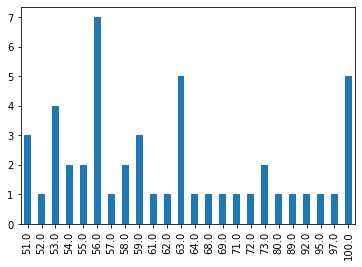

In [58]:
summ_combo_df.loc[summ_combo_df['prcnt_produce'] > 50]['prcnt_produce'].value_counts().sort_index().plot.bar()

In [59]:
# Let's investigate the demographic with 61% produce purchases.

In [60]:
summ_combo_df.loc[summ_combo_df['prcnt_produce'] == 61][['prcnt_produce'] + demo_columns].sort_values('prcnt_produce', ascending=False)

,prcnt_produce,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
1065,61.0,Regular customer,High spender,Frequent customer,Female,single,South,Younger,Low-mid


In [61]:
summ_combo_df.loc[summ_combo_df['prcnt_produce'] == 61].sort_values('prcnt_produce', ascending=False)

,total_order_count,count_snacks,prcnt_snacks,count_meat seafood,prcnt_meat seafood,count_bulk,prcnt_bulk,count_produce,prcnt_produce,count_breakfast,prcnt_breakfast,count_pantry,prcnt_pantry,count_dairy eggs,prcnt_dairy eggs,count_frozen,prcnt_frozen,count_beverages,prcnt_beverages,count_deli,prcnt_deli,count_household,prcnt_household,count_personal care,prcnt_personal care,count_bakery,prcnt_bakery,count_international,prcnt_international,count_other,prcnt_other,count_missing,prcnt_missing,count_canned goods,prcnt_canned goods,count_dry goods pasta,prcnt_dry goods pasta,count_babies,prcnt_babies,count_alcohol,prcnt_alcohol,count_pets,prcnt_pets,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
1065,70,4.0,6.0,NaN,NaN,NaN,NaN,43.0,61.0,1.0,1.0,2.0,3.0,6.0,9.0,NaN,NaN,11.0,16.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular customer,High spender,Frequent customer,Female,single,South,Younger,Low-mid


In [62]:
sixty_one_prcnt_produce_df = summ_combo_df.loc[summ_combo_df['prcnt_produce']== 61][['prcnt_produce'] + demo_columns]

In [63]:
sixty_one_prcnt_produce_df

,prcnt_produce,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
1065,61.0,Regular customer,High spender,Frequent customer,Female,single,South,Younger,Low-mid


In [64]:
sixty_one_prcnt_produce_stats_df = pd.merge(sixty_one_prcnt_produce_df, high_cust_df_three_more_columns, how='left')

In [65]:
sixty_one_prcnt_produce_stats_df.shape

(70, 38)

In [66]:
sixty_one_prcnt_produce_stats_df['customer_id'].value_counts()

181977    34
148573    22
139330    14
Name: customer_id, dtype: int64

In [67]:
sixty_one_prcnt_produce_stats_df['state'].value_counts()

District of Columbia    34
Florida                 22
West Virginia           14
Name: state, dtype: int64

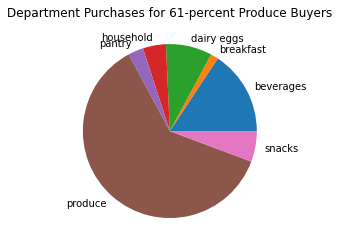

In [68]:
grouped = sixty_one_prcnt_produce_stats_df.groupby('department').size()
plt.pie(grouped.values, labels=grouped.index)
plt.title("Department Purchases for 61-percent Produce Buyers")

# Save the plot to a file.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'pie_sixty_one_prcnt_produce_stats_df.png'), facecolor='white')

plt.show()
print ()

In [69]:
# Let's investigate the demographics with 56% produce purchases.

In [70]:
summ_combo_df.loc[summ_combo_df['prcnt_produce'] == 56][['prcnt_produce'] + demo_columns].sort_values('prcnt_produce', ascending=False)

,prcnt_produce,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
688,56.0,Regular customer,Low spender,Non-frequent customer,Male,divorced/widowed,South,Late-mid,Lower
932,56.0,Regular customer,High spender,Frequent customer,Male,living with parents and siblings,West,Younger,Lower
1163,56.0,Regular customer,High spender,Regular customer,Male,single,West,Early-mid,Lower
1284,56.0,Regular customer,High spender,Regular customer,Female,single,South,Early-mid,Mid-high
2234,56.0,New customer,High spender,Frequent customer,Male,married,Northeast,Late-mid,Low-mid
2353,56.0,New customer,High spender,Frequent customer,Female,divorced/widowed,Northeast,Older,Mid-high
2579,56.0,New customer,High spender,Regular customer,Female,single,Midwest,Younger,Mid-high


In [71]:
summ_combo_df.loc[summ_combo_df['prcnt_produce'] == 56].sort_values('prcnt_produce', ascending=False)

,total_order_count,count_snacks,prcnt_snacks,count_meat seafood,prcnt_meat seafood,count_bulk,prcnt_bulk,count_produce,prcnt_produce,count_breakfast,prcnt_breakfast,count_pantry,prcnt_pantry,count_dairy eggs,prcnt_dairy eggs,count_frozen,prcnt_frozen,count_beverages,prcnt_beverages,count_deli,prcnt_deli,count_household,prcnt_household,count_personal care,prcnt_personal care,count_bakery,prcnt_bakery,count_international,prcnt_international,count_other,prcnt_other,count_missing,prcnt_missing,count_canned goods,prcnt_canned goods,count_dry goods pasta,prcnt_dry goods pasta,count_babies,prcnt_babies,count_alcohol,prcnt_alcohol,count_pets,prcnt_pets,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
688,81,9.0,11.0,NaN,NaN,NaN,NaN,45.0,56.0,3.0,4.0,1.0,1.0,9.0,11.0,NaN,NaN,5.0,6.0,3.0,4.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular customer,Low spender,Non-frequent customer,Male,divorced/widowed,South,Late-mid,Lower
932,78,NaN,NaN,19.0,24.0,NaN,NaN,44.0,56.0,NaN,NaN,2.0,3.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Regular customer,High spender,Frequent customer,Male,living with parents and siblings,West,Younger,Lower
1163,41,NaN,NaN,1.0,2.0,NaN,NaN,23.0,56.0,NaN,NaN,3.0,7.0,13.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular customer,High spender,Regular customer,Male,single,West,Early-mid,Lower
1284,27,NaN,NaN,3.0,11.0,NaN,NaN,15.0,56.0,NaN,NaN,2.0,7.0,7.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular customer,High spender,Regular customer,Female,single,South,Early-mid,Mid-high
2234,34,1.0,3.0,3.0,9.0,NaN,NaN,19.0,56.0,NaN,NaN,1.0,3.0,7.0,21.0,3.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New customer,High spender,Frequent customer,Male,married,Northeast,Late-mid,Low-mid
2353,88,4.0,5.0,9.0,10.0,NaN,NaN,49.0,56.0,2.0,2.0,4.0,5.0,7.0,8.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New customer,High spender,Frequent customer,Female,divorced/widowed,Northeast,Older,Mid-high
2579,86,1.0,1.0,1.0,1.0,NaN,NaN,48.0,56.0,NaN,NaN,5.0,6.0,18.0,21.0,1.0,1.0,2.0,2.0,NaN,NaN,3.0,3.0,1.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,New customer,High spender,Regular customer,Female,single,Midwest,Younger,Mid-high


In [72]:
fifty_six_prcnt_produce_df = summ_combo_df.loc[summ_combo_df['prcnt_produce']== 56][['prcnt_produce'] + demo_columns]

In [73]:
fifty_six_prcnt_produce_df

,prcnt_produce,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
688,56.0,Regular customer,Low spender,Non-frequent customer,Male,divorced/widowed,South,Late-mid,Lower
932,56.0,Regular customer,High spender,Frequent customer,Male,living with parents and siblings,West,Younger,Lower
1163,56.0,Regular customer,High spender,Regular customer,Male,single,West,Early-mid,Lower
1284,56.0,Regular customer,High spender,Regular customer,Female,single,South,Early-mid,Mid-high
2234,56.0,New customer,High spender,Frequent customer,Male,married,Northeast,Late-mid,Low-mid
2353,56.0,New customer,High spender,Frequent customer,Female,divorced/widowed,Northeast,Older,Mid-high
2579,56.0,New customer,High spender,Regular customer,Female,single,Midwest,Younger,Mid-high


In [74]:
fifty_six_prcnt_produce_stats_df = pd.merge(fifty_six_prcnt_produce_df, high_cust_df_three_more_columns, how='left')

In [75]:
fifty_six_prcnt_produce_stats_df.shape

(435, 38)

In [76]:
fifty_six_prcnt_produce_stats_df['customer_id'].value_counts()

33275     78
77454     65
146863    61
18684     49
63425     41
199144    34
4741      32
159845    27
144568    27
63021     21
Name: customer_id, dtype: int64

In [77]:
fifty_six_prcnt_produce_stats_df['state'].value_counts()

Massachusetts    88
Minnesota        86
Nevada           78
Kentucky         49
Oregon           41
Rhode Island     34
West Virginia    32
Georgia          27
Name: state, dtype: int64

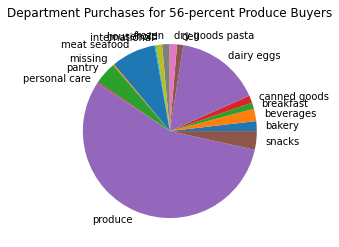

In [78]:
grouped = fifty_six_prcnt_produce_stats_df.groupby('department').size()
plt.pie(grouped.values, labels=grouped.index)
plt.title("Department Purchases for 56-percent Produce Buyers")

# Save the plot to a file.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'pie_fifty_six_prcnt_produce_stats_df.png'), facecolor='white')

plt.show()
print ()

In [79]:
# Let's investigate the demographics with 100% produce purchases.

In [80]:
summ_combo_df.loc[summ_combo_df['prcnt_produce'] == 100][['prcnt_produce'] + demo_columns].sort_values('prcnt_produce', ascending=False)

,prcnt_produce,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
962,100.0,Regular customer,High spender,Frequent customer,Male,single,South,Younger,Lower
1036,100.0,Regular customer,High spender,Frequent customer,Female,divorced/widowed,West,Older,Low-mid
1042,100.0,Regular customer,High spender,Frequent customer,Female,single,Midwest,Late-mid,Low-mid
1061,100.0,Regular customer,High spender,Frequent customer,Female,single,South,Late-mid,Low-mid
2240,100.0,New customer,High spender,Frequent customer,Male,married,Northeast,Early-mid,Mid-high


In [81]:
summ_combo_df.loc[summ_combo_df['prcnt_produce'] == 100].sort_values('prcnt_produce', ascending=False)

,total_order_count,count_snacks,prcnt_snacks,count_meat seafood,prcnt_meat seafood,count_bulk,prcnt_bulk,count_produce,prcnt_produce,count_breakfast,prcnt_breakfast,count_pantry,prcnt_pantry,count_dairy eggs,prcnt_dairy eggs,count_frozen,prcnt_frozen,count_beverages,prcnt_beverages,count_deli,prcnt_deli,count_household,prcnt_household,count_personal care,prcnt_personal care,count_bakery,prcnt_bakery,count_international,prcnt_international,count_other,prcnt_other,count_missing,prcnt_missing,count_canned goods,prcnt_canned goods,count_dry goods pasta,prcnt_dry goods pasta,count_babies,prcnt_babies,count_alcohol,prcnt_alcohol,count_pets,prcnt_pets,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
962,23,NaN,NaN,NaN,NaN,NaN,NaN,23.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular customer,High spender,Frequent customer,Male,single,South,Younger,Lower
1036,12,NaN,NaN,NaN,NaN,NaN,NaN,12.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular customer,High spender,Frequent customer,Female,divorced/widowed,West,Older,Low-mid
1042,74,NaN,NaN,NaN,NaN,NaN,NaN,74.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular customer,High spender,Frequent customer,Female,single,Midwest,Late-mid,Low-mid
1061,21,NaN,NaN,NaN,NaN,NaN,NaN,21.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular customer,High spender,Frequent customer,Female,single,South,Late-mid,Low-mid
2240,23,NaN,NaN,NaN,NaN,NaN,NaN,23.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New customer,High spender,Frequent customer,Male,married,Northeast,Early-mid,Mid-high


In [82]:
one_hundred_prcnt_produce_df = summ_combo_df.loc[summ_combo_df['prcnt_produce']== 100][['prcnt_produce'] + demo_columns]

In [83]:
one_hundred_prcnt_produce_df

,prcnt_produce,loyalty_flag,spending_flag,frequency_flag,gender,fam_status,region,age_category,income_category
962,100.0,Regular customer,High spender,Frequent customer,Male,single,South,Younger,Lower
1036,100.0,Regular customer,High spender,Frequent customer,Female,divorced/widowed,West,Older,Low-mid
1042,100.0,Regular customer,High spender,Frequent customer,Female,single,Midwest,Late-mid,Low-mid
1061,100.0,Regular customer,High spender,Frequent customer,Female,single,South,Late-mid,Low-mid
2240,100.0,New customer,High spender,Frequent customer,Male,married,Northeast,Early-mid,Mid-high


In [84]:
one_hundred_prcnt_produce_stats_df = pd.merge(one_hundred_prcnt_produce_df, high_cust_df_three_more_columns, how='left')

In [85]:
one_hundred_prcnt_produce_stats_df.shape

(153, 38)

In [86]:
one_hundred_prcnt_produce_stats_df['customer_id'].value_counts()

167914    74
86250     23
203983    23
156486    21
142169    12
Name: customer_id, dtype: int64

In [87]:
one_hundred_prcnt_produce_stats_df['state'].value_counts()

Nebraska                74
District of Columbia    23
Massachusetts           23
Kentucky                21
Oregon                  12
Name: state, dtype: int64

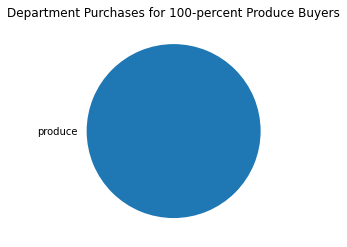

In [88]:
grouped = one_hundred_prcnt_produce_stats_df.groupby('department').size()
plt.pie(grouped.values, labels=grouped.index)
plt.title("Department Purchases for 100-percent Produce Buyers")

# Save the plot to a file.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'pie_one_hundred_prcnt_produce_stats_df.png'), facecolor='white')

plt.show()
print ()

In [89]:
high_cust_df_three_more_columns['prices'].max()

25.0

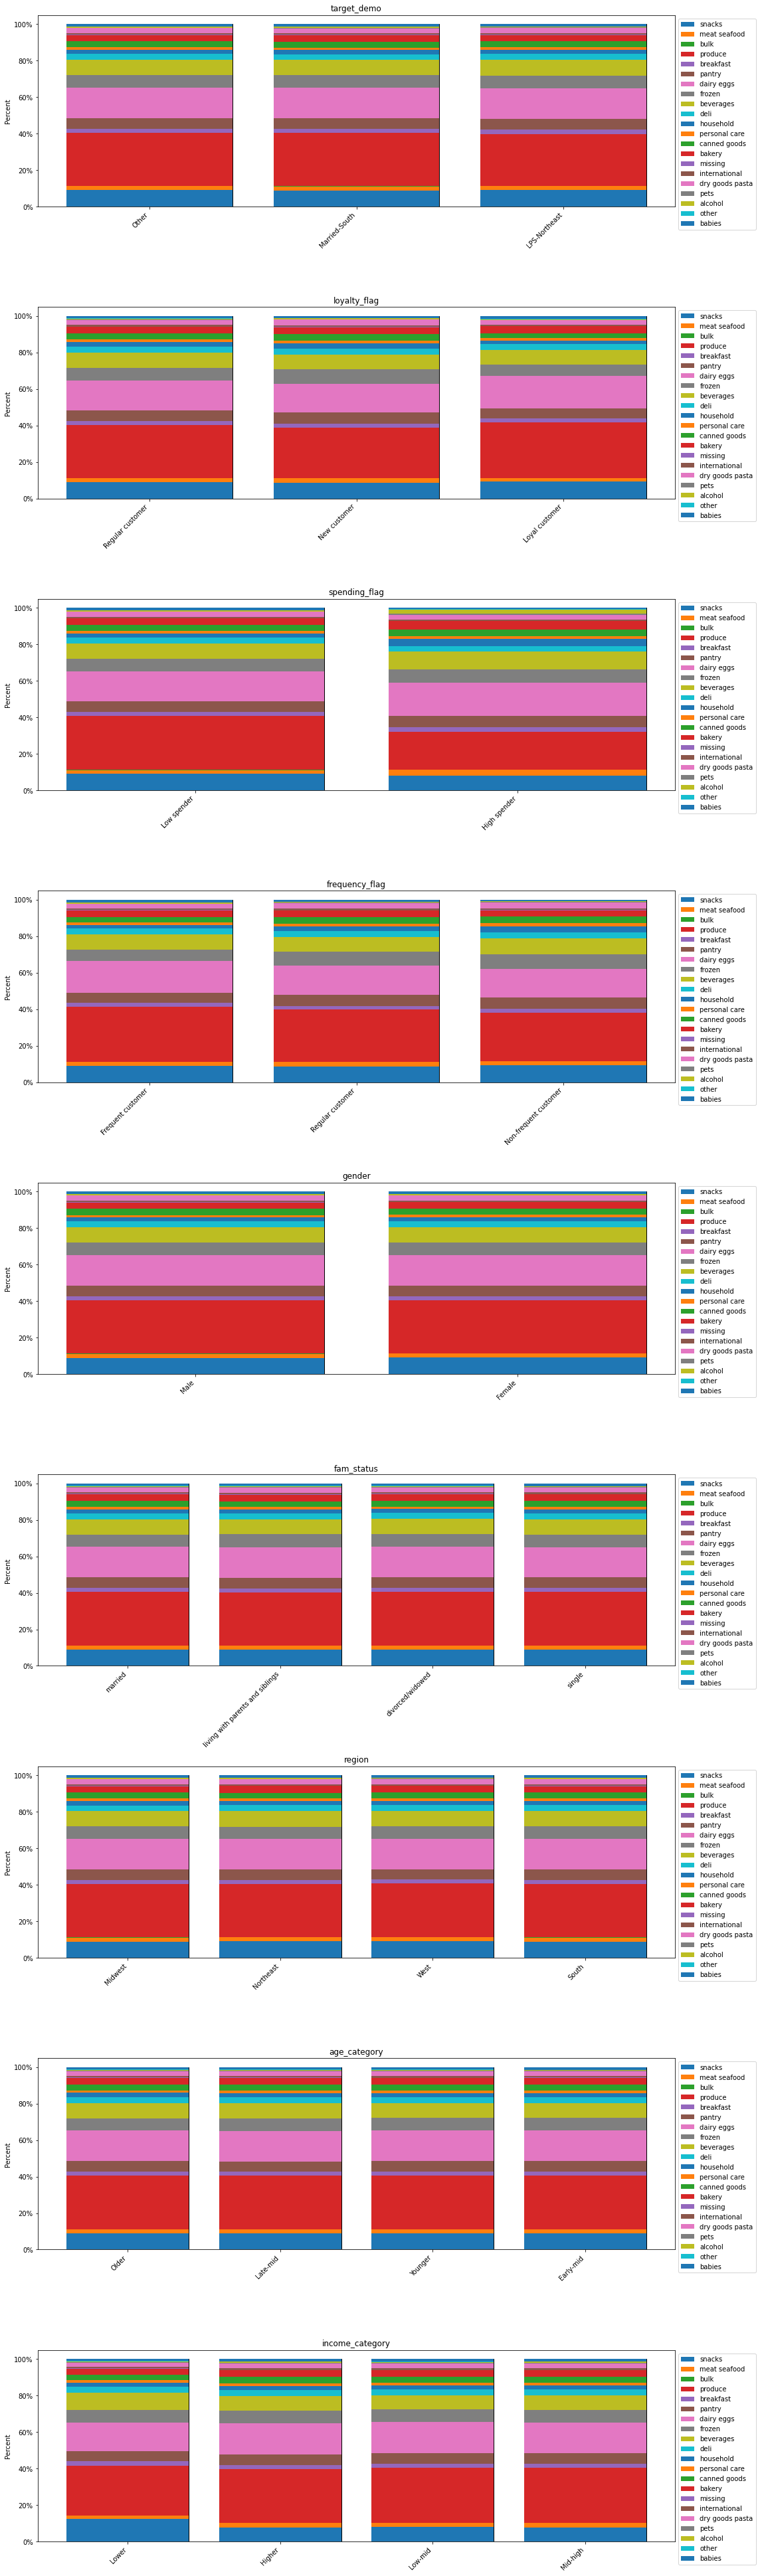

In [90]:
# define the column(s) to evaluate
demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']

# set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# loop over the columns
for i, col_name in enumerate(demo_columns):
    # get the unique values of the column
    values = high_cust_df_three_more_columns[col_name].unique()
    
    # calculate the percentage of each department for each value
    percentages = []
    for value in values:
        slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
        grouped = slice.groupby('department').size()
        percentages.append(grouped / grouped.sum() * 100)

    # create a stacked bar chart
    ax = plt.subplot(len(demo_columns), 1, i+1)
    ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
    bottom = np.zeros(len(values))
    for j, dept in enumerate(high_cust_df_three_more_columns['department'].unique()):
        ax.bar(range(len(values)), [x.get(dept, 0) for x in percentages], bottom=bottom, label=dept)
        bottom += [x.get(dept, 0) for x in percentages]

    # set the x and y axis labels, and the title
    ax.set_xticks(range(len(values)))
    ax.set_xticklabels(values, rotation=45, ha='right')
    ax.set_ylabel('Percent')
    ax.set_title(col_name)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

# set the layout and display the figure
plt.tight_layout()
plt.show()


In [91]:
high_cust_df_three_more_columns.head(1)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_days,busiest_hours,max_order,loyalty_flag,avg_order,spending_flag,avg_order_frequency,frequency_flag,gender,state,age,date_joined,num_dependents,fam_status,income,region,activity,age_category,income_category,department,target_demo
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Busiest hours,32,Regular customer,6.935811,Low spender,9.837838,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high,Older,Lower,snacks,Other



target_demo vs orders_day_of_week


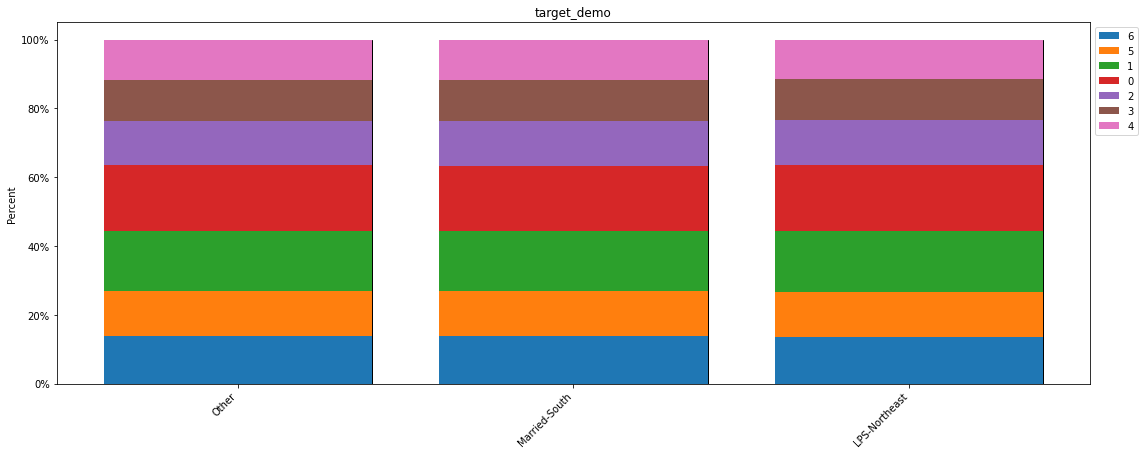


loyalty_flag vs orders_day_of_week


/tmp/ipykernel_2703/1575267876.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


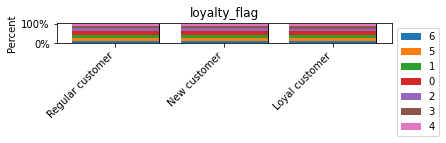


spending_flag vs orders_day_of_week


/tmp/ipykernel_2703/1575267876.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


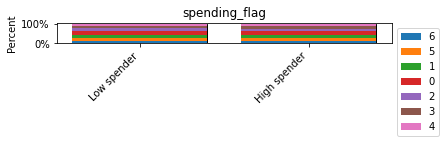


frequency_flag vs orders_day_of_week


/tmp/ipykernel_2703/1575267876.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


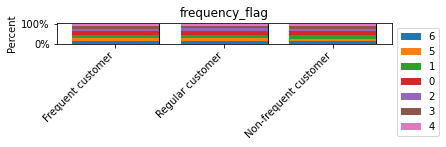


gender vs orders_day_of_week


/tmp/ipykernel_2703/1575267876.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


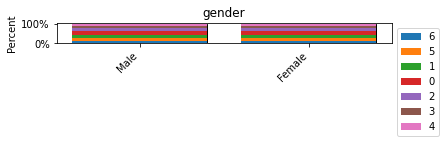


fam_status vs orders_day_of_week


/tmp/ipykernel_2703/1575267876.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


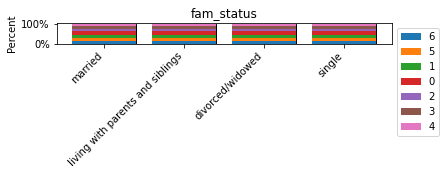


region vs orders_day_of_week


/tmp/ipykernel_2703/1575267876.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


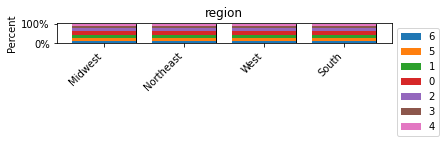


age_category vs orders_day_of_week


/tmp/ipykernel_2703/1575267876.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


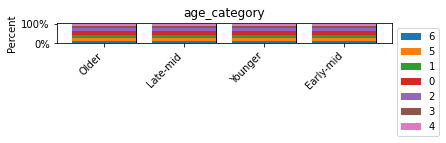


income_category vs orders_day_of_week


/tmp/ipykernel_2703/1575267876.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


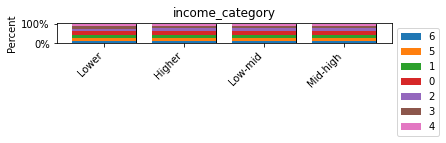

In [92]:
# Define the demographic column(s) to evaluate
demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
#demo_columns = ['loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']

# Define the purchase behavior columns to evaluate
#purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
purchase_columns = ['orders_day_of_week']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df_three_more_columns[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df_three_more_columns[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        plt.show()



target_demo vs department
target_demo vs orders_day_of_week
target_demo vs order_hour_of_day
target_demo vs days_since_prior_order
target_demo vs price_range

loyalty_flag vs department
loyalty_flag vs orders_day_of_week
loyalty_flag vs order_hour_of_day
loyalty_flag vs days_since_prior_order
loyalty_flag vs price_range

spending_flag vs department
spending_flag vs orders_day_of_week
spending_flag vs order_hour_of_day
spending_flag vs days_since_prior_order
spending_flag vs price_range

frequency_flag vs department
frequency_flag vs orders_day_of_week
frequency_flag vs order_hour_of_day
frequency_flag vs days_since_prior_order
frequency_flag vs price_range

gender vs department
gender vs orders_day_of_week
gender vs order_hour_of_day
gender vs days_since_prior_order
gender vs price_range

fam_status vs department
fam_status vs orders_day_of_week
fam_status vs order_hour_of_day
fam_status vs days_since_prior_order
fam_status vs price_range

region vs department
region vs orders_day_of_

/tmp/ipykernel_2703/2970672608.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


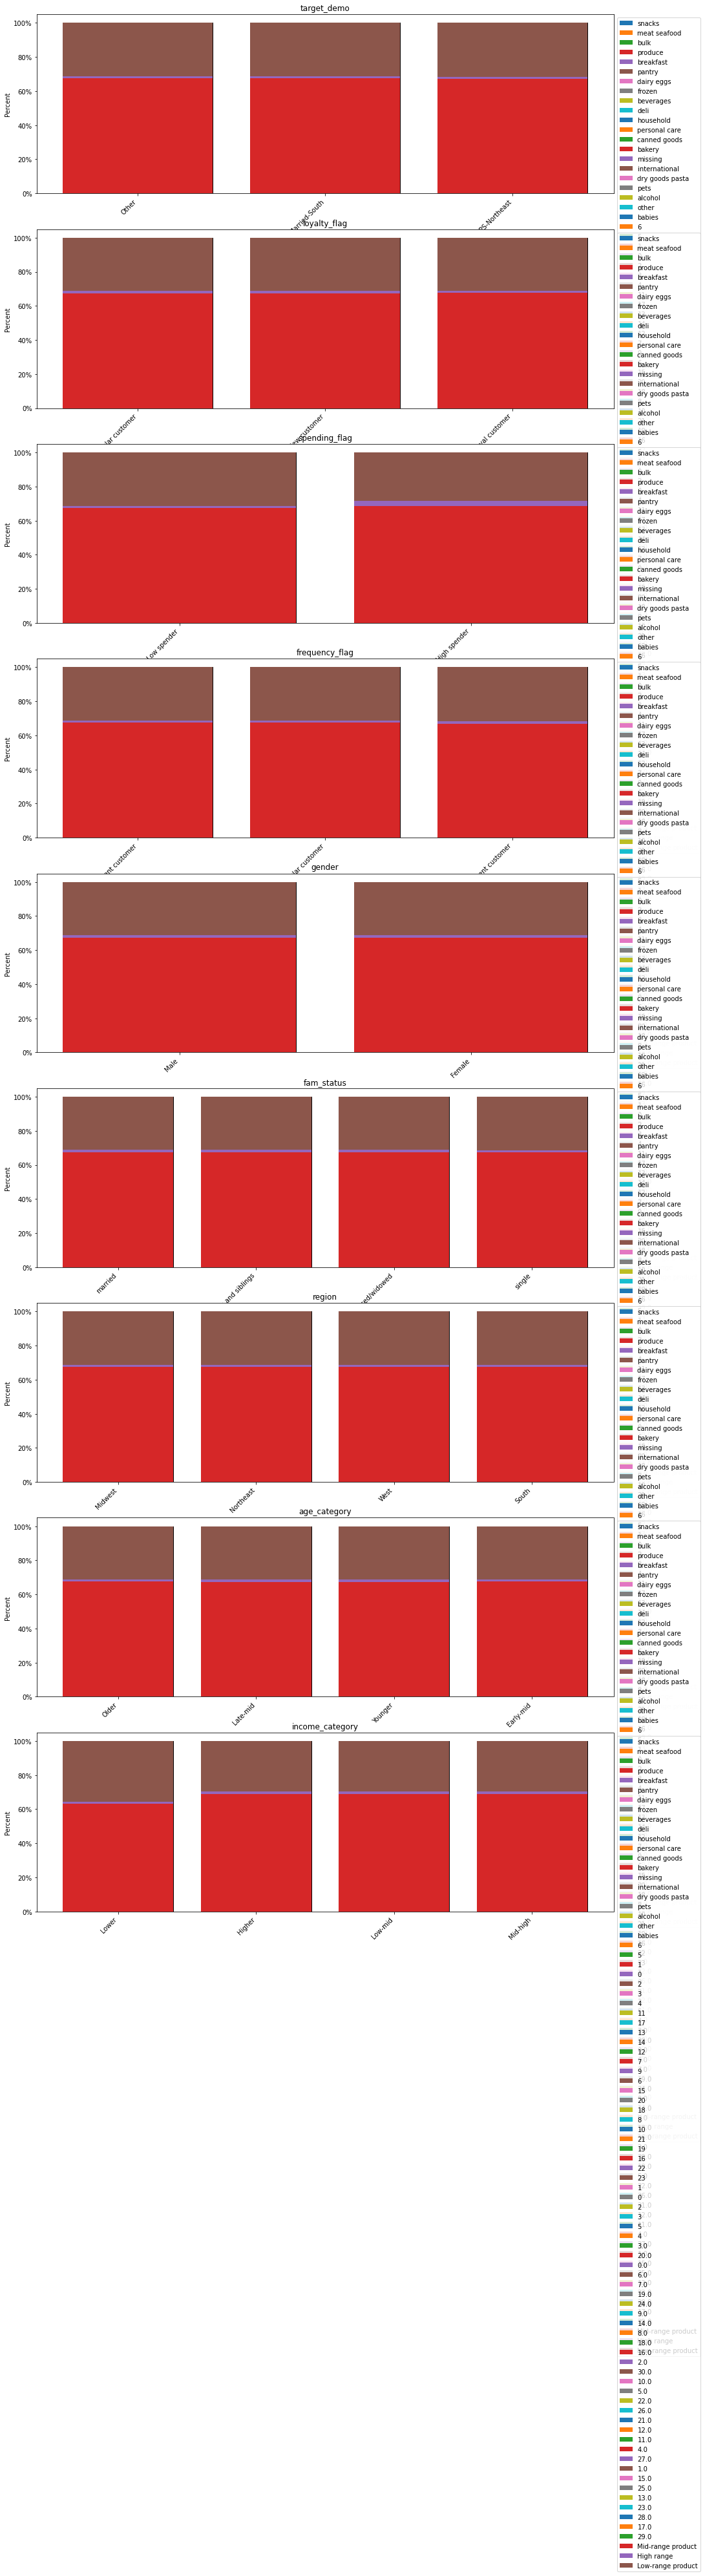

In [93]:
# Define the demographic column(s) to evaluate
demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
#demo_columns = ['loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['orders_day_of_week']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df_three_more_columns[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df_three_more_columns[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

# set the layout and display the figure
plt.tight_layout()
plt.show()


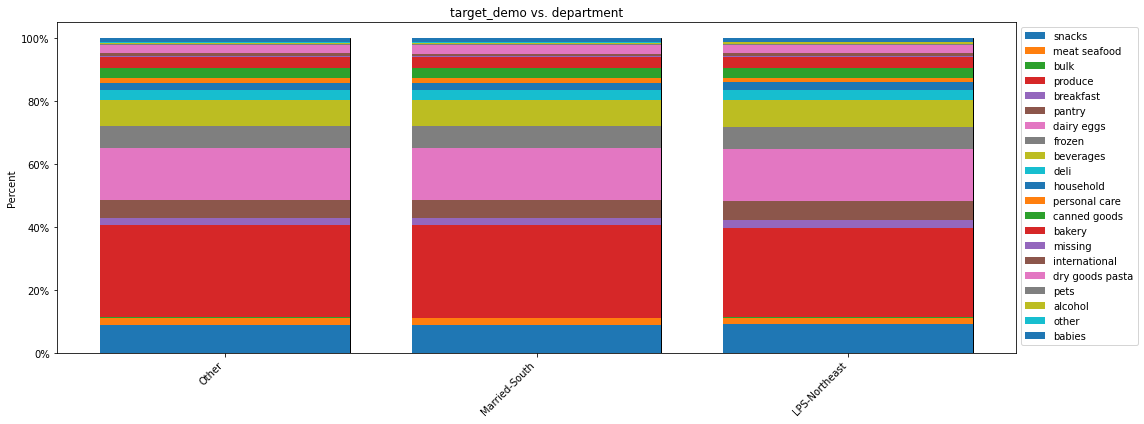

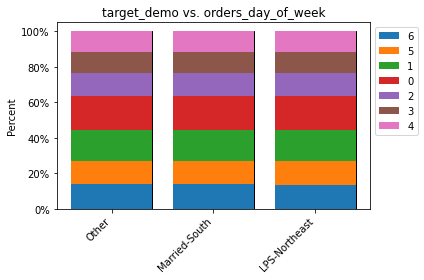

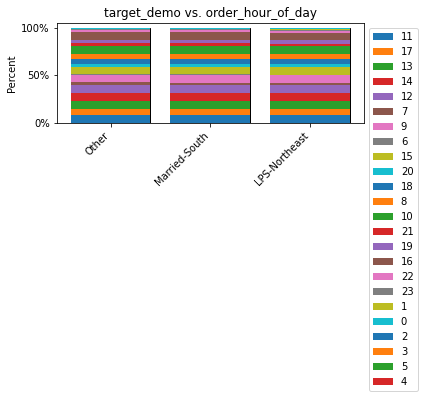

/tmp/ipykernel_2703/3324525089.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


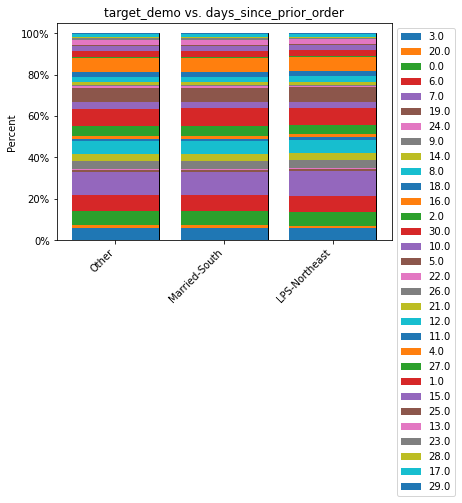

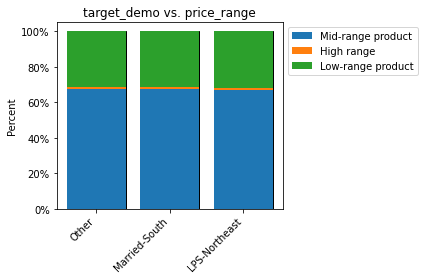

In [94]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['target_demo']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df_three_more_columns[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df_three_more_columns[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        plt.show()


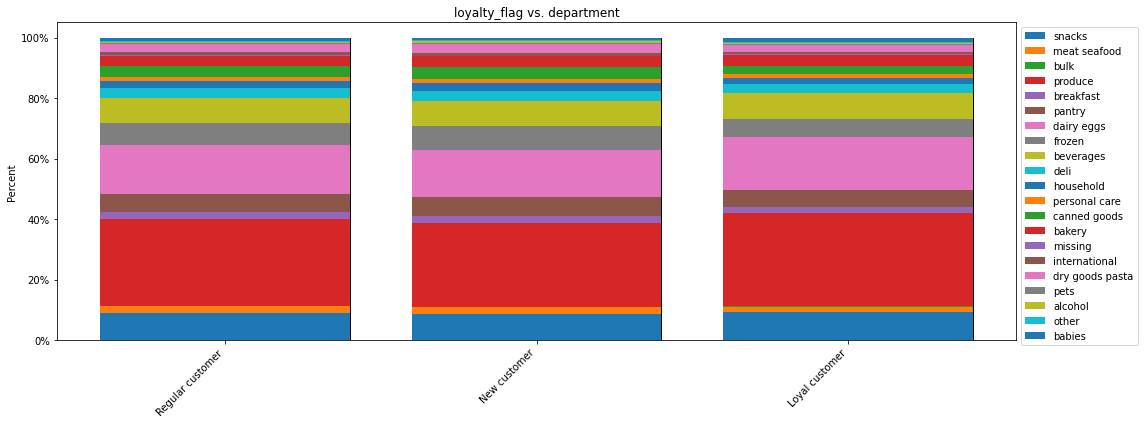

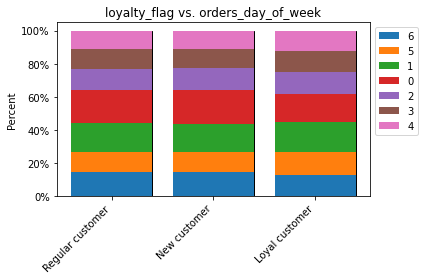

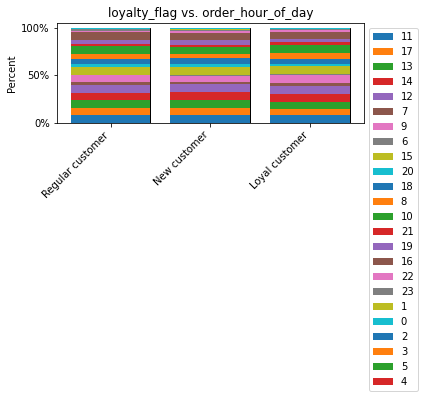

/tmp/ipykernel_2703/485691681.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


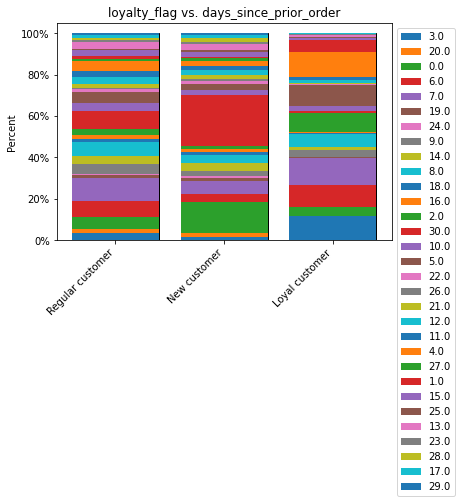

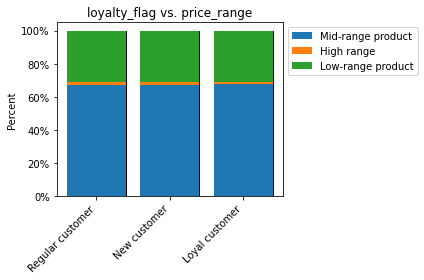

In [95]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['loyalty_flag']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df_three_more_columns[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df_three_more_columns[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        plt.show()


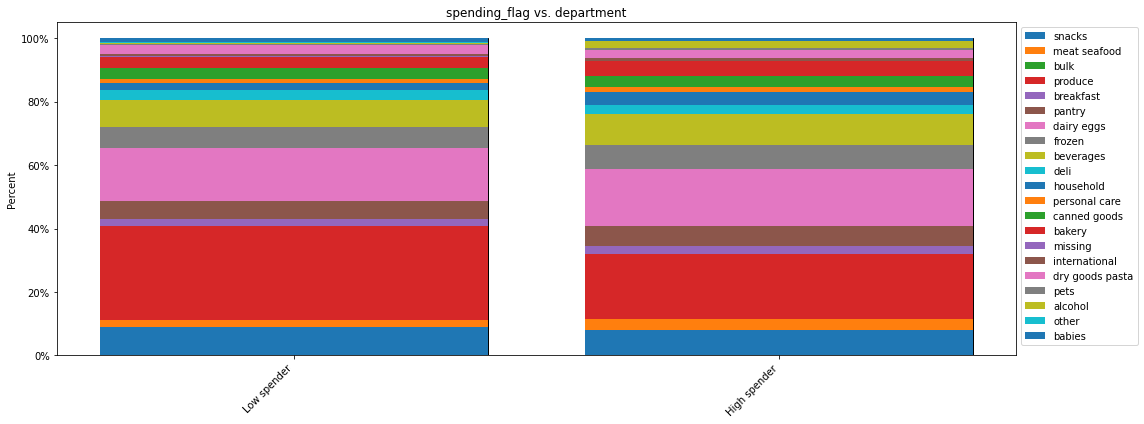

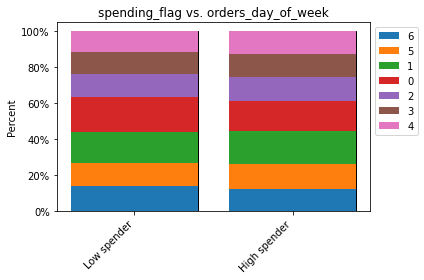

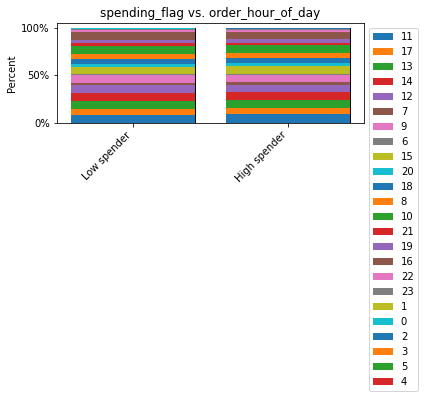

/tmp/ipykernel_2703/3497703520.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


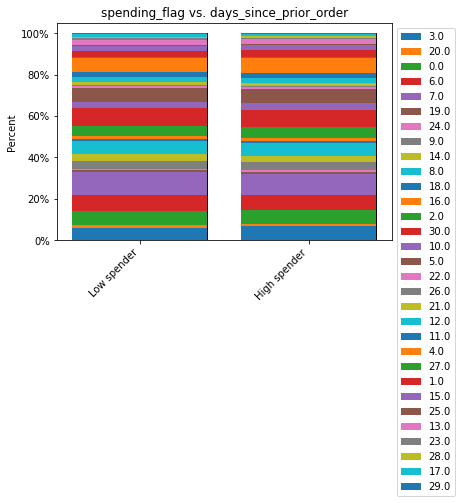

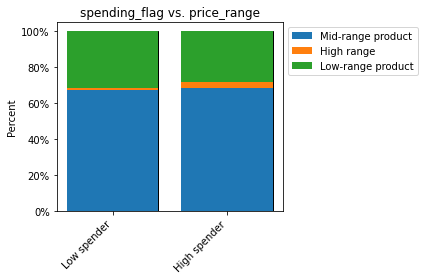

In [96]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['spending_flag']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df_three_more_columns[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df_three_more_columns[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        plt.show()


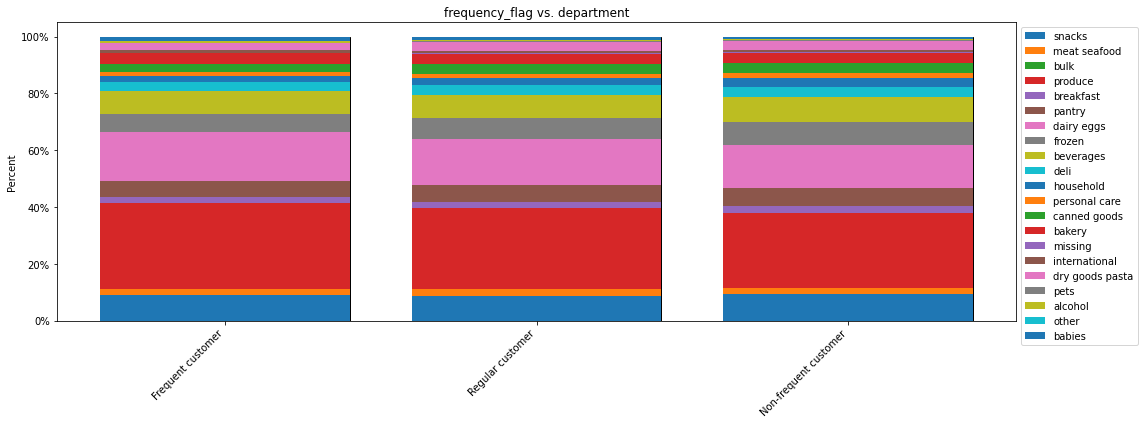

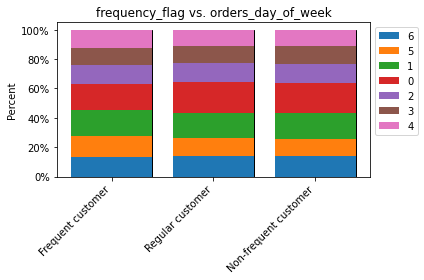

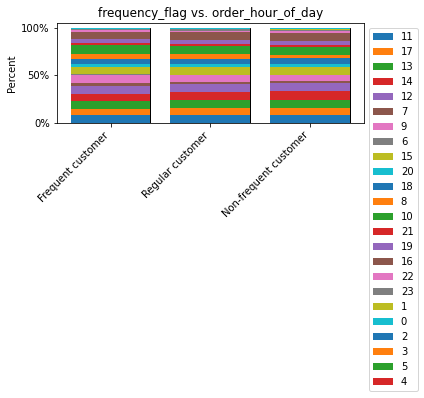

/tmp/ipykernel_2703/1121519580.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


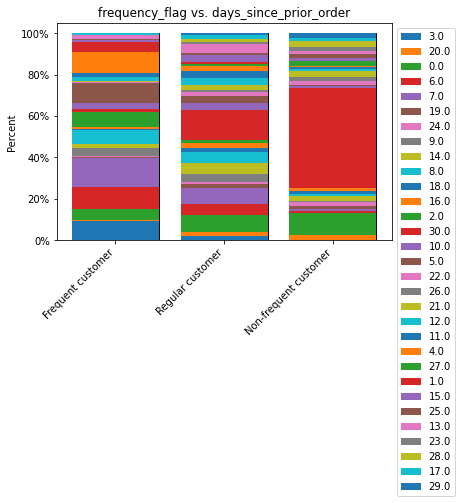

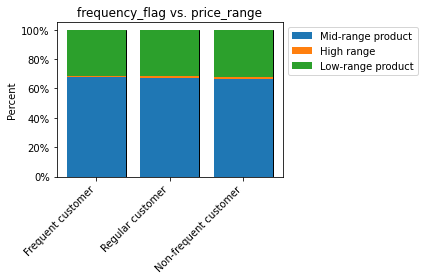

In [97]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['frequency_flag']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df_three_more_columns[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df_three_more_columns[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        plt.show()


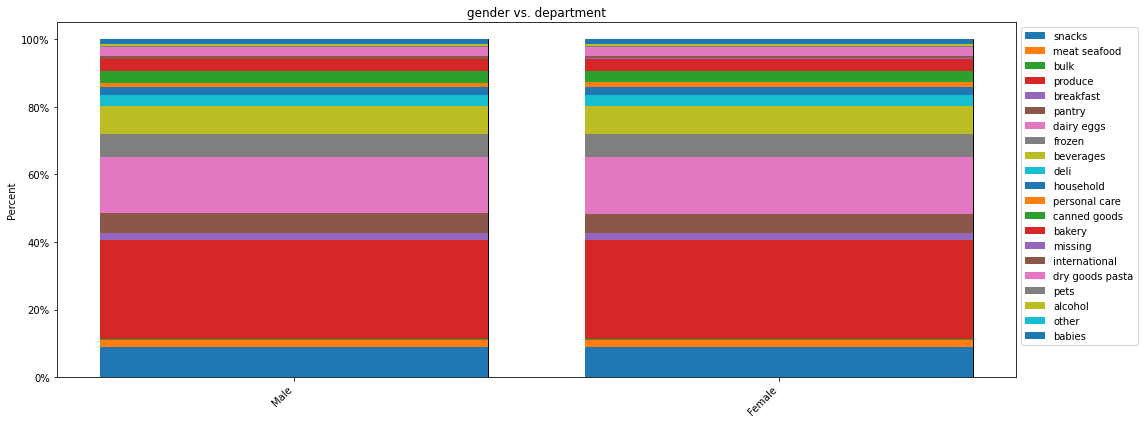

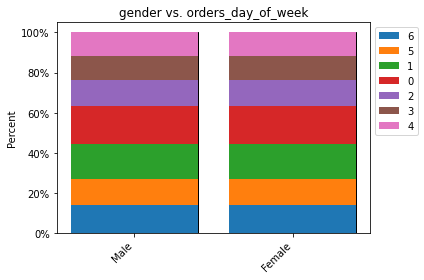

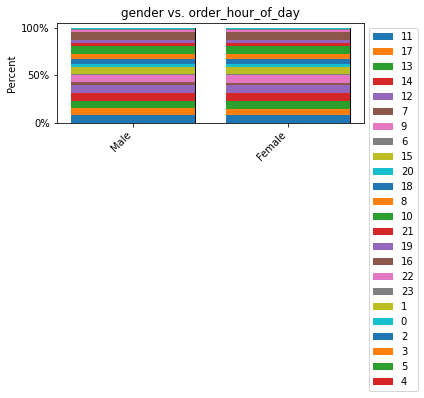

/tmp/ipykernel_2703/1084730139.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


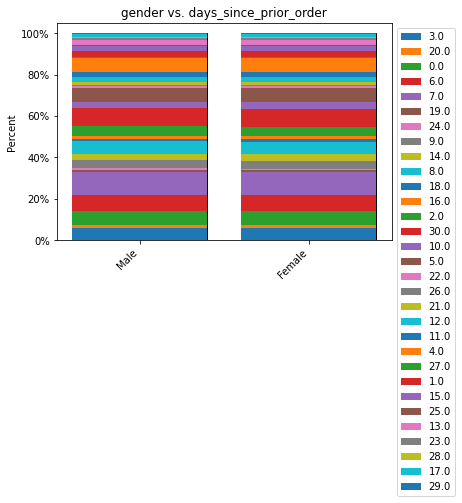

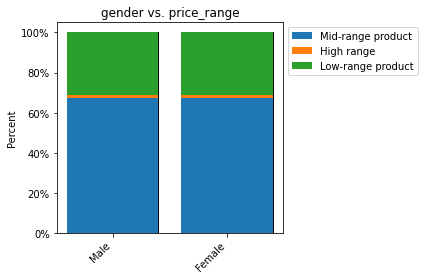

In [98]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['gender']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df_three_more_columns[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df_three_more_columns[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        plt.show()


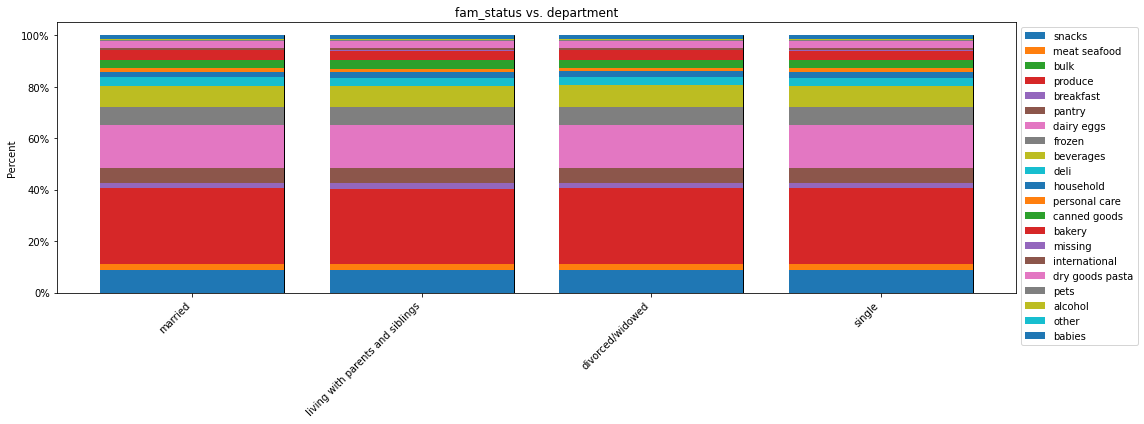

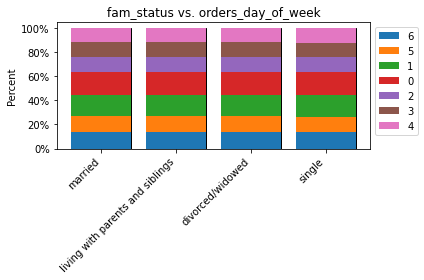

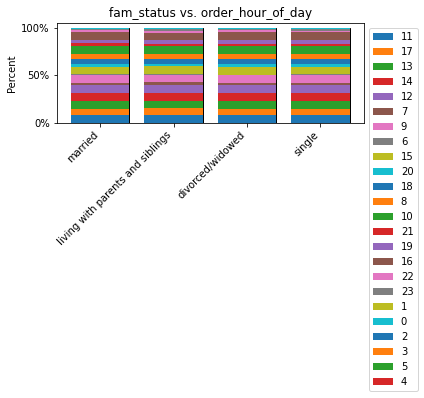

/tmp/ipykernel_2703/1475164756.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


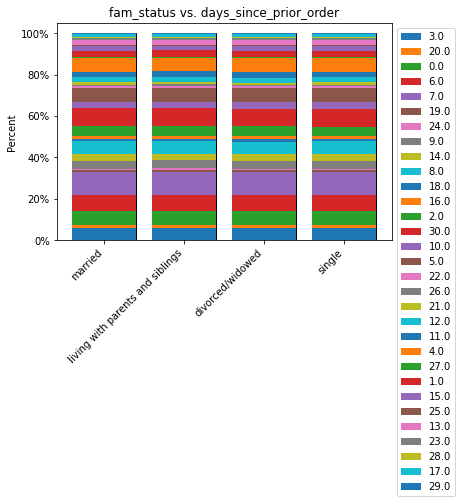

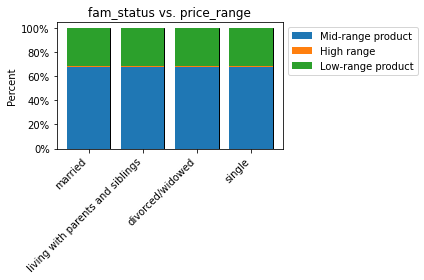

In [99]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['fam_status']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df_three_more_columns[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df_three_more_columns[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        plt.show()


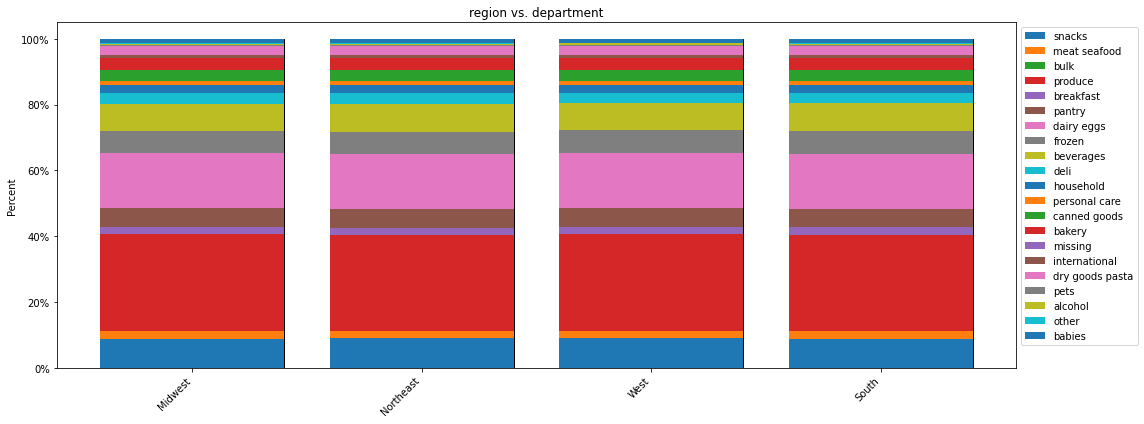

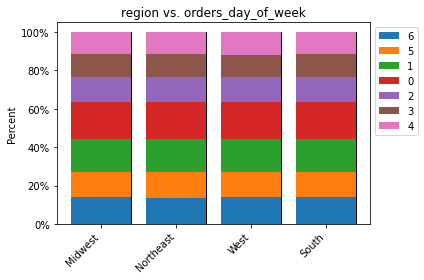

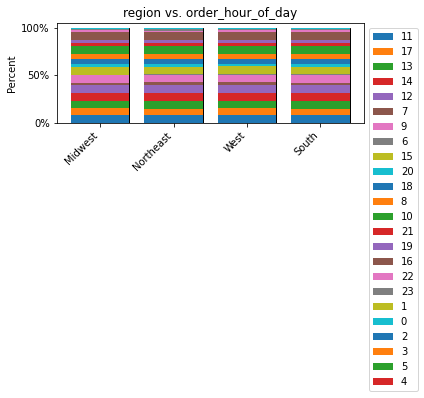

/tmp/ipykernel_2703/283137859.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


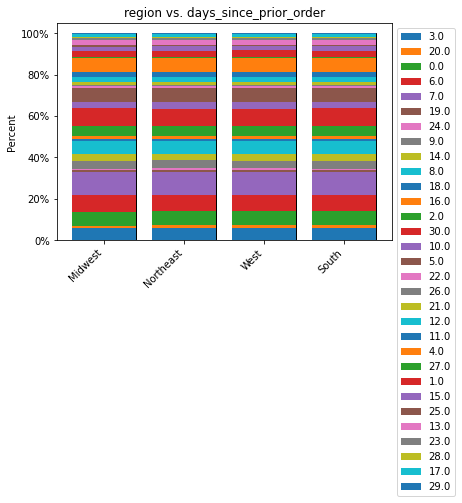

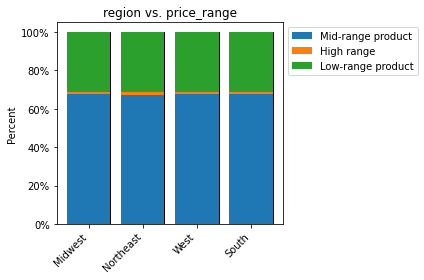

In [100]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['region']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df_three_more_columns[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df_three_more_columns[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        plt.show()


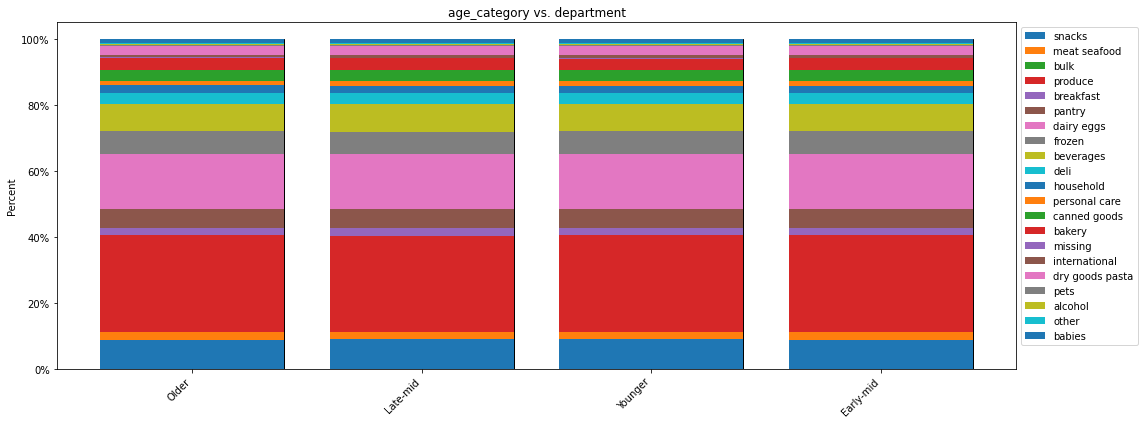

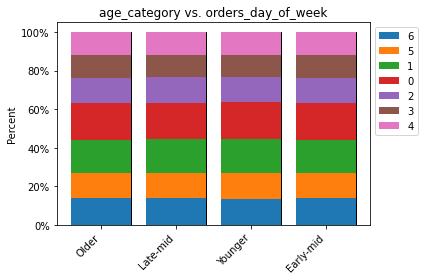

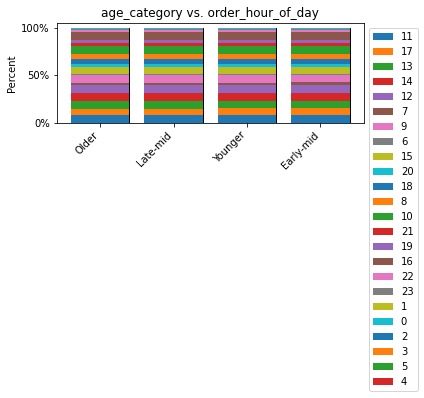

/tmp/ipykernel_2703/3326011996.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


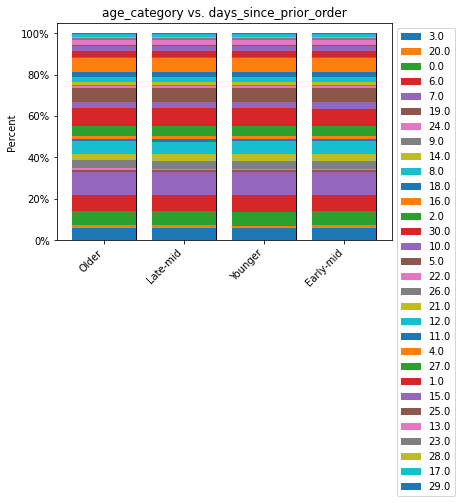

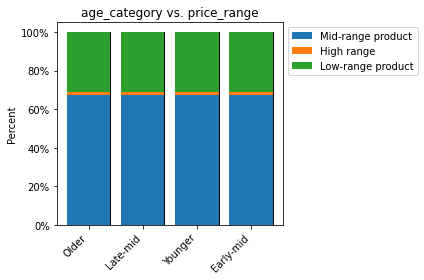

In [101]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['age_category']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df_three_more_columns[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df_three_more_columns[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        plt.show()


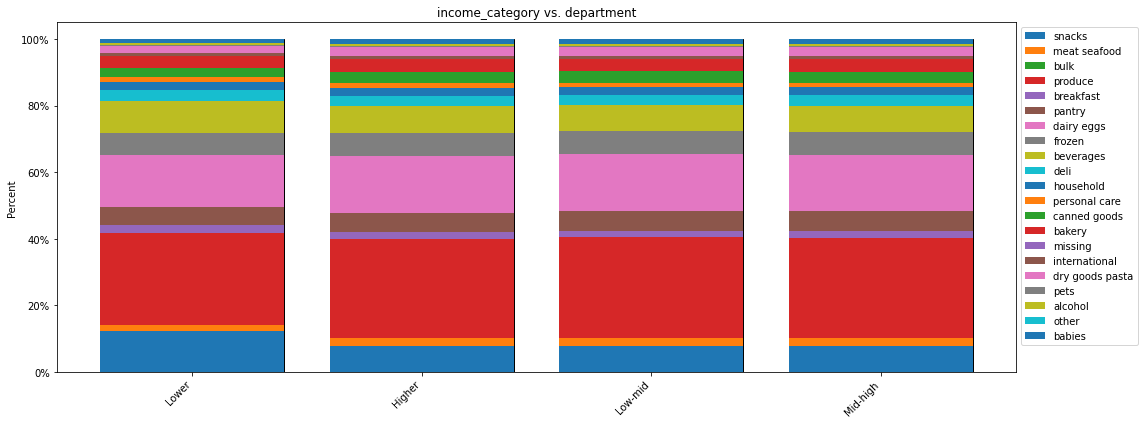

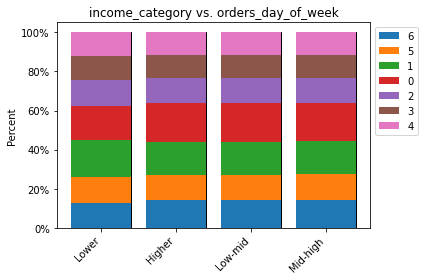

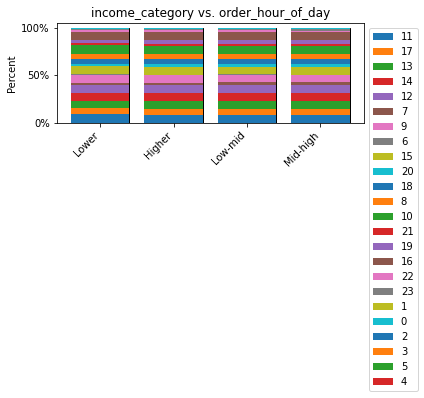

/tmp/ipykernel_2703/3728000918.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


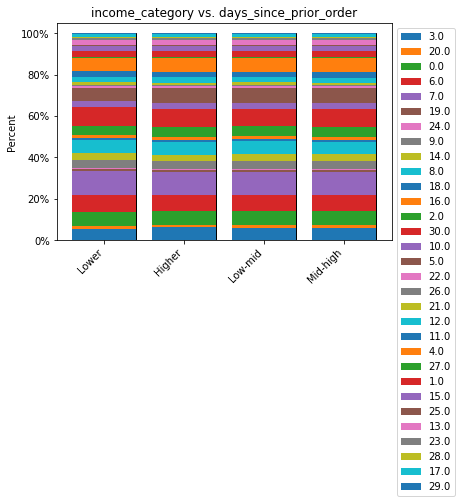

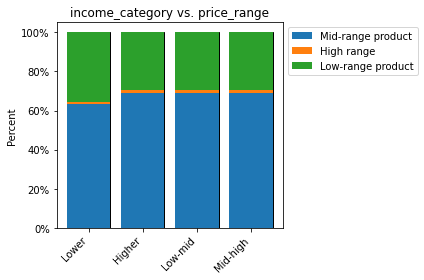

In [102]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['income_category']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df_three_more_columns[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df_three_more_columns.loc[high_cust_df_three_more_columns[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df_three_more_columns[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        plt.show()
